In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
import os
from keras.preprocessing.image import ImageDataGenerator
train_dir = os.path.join('/content/gdrive/MyDrive/faces2/', 'Training')
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
#train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),class_mode='binary')

Found 2051 images belonging to 2 classes.


In [13]:
from keras.preprocessing.image import ImageDataGenerator
#train_datagen = ImageDataGenerator(rescale=1./255)
#train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),class_mode='categorical')
validation_dir = os.path.join('/content/gdrive/MyDrive/faces2/', 'Validation')
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(150, 150),class_mode='binary')

Found 819 images belonging to 2 classes.


In [14]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False ,input_shape=(150,150, 3))

In [15]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [16]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
conv_base.trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [18]:
# Use the updated RMSprop optimizer
from keras import optimizers
# Use the updated RMSprop optimizer
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=2e-5), metrics=['acc'])

In [19]:
epochs = 20  # Increase the number of epochs for better training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Epoch 1/20
65/65 [==============================] - 818s 13s/step - loss: 0.6144 - acc: 0.6792 - val_loss: 0.6099 - val_acc: 0.6239
Epoch 2/20
65/65 [==============================] - 814s 13s/step - loss: 0.5313 - acc: 0.7591 - val_loss: 0.4591 - val_acc: 0.7973
Epoch 3/20
65/65 [==============================] - 821s 13s/step - loss: 0.4889 - acc: 0.7791 - val_loss: 0.4195 - val_acc: 0.8120
Epoch 4/20
65/65 [==============================] - 810s 13s/step - loss: 0.4622 - acc: 0.7918 - val_loss: 0.3797 - val_acc: 0.8486
Epoch 5/20
65/65 [==============================] - 764s 12s/step - loss: 0.4354 - acc: 0.8147 - val_loss: 0.3842 - val_acc: 0.8242
Epoch 6/20
65/65 [==============================] - 806s 12s/step - loss: 0.4175 - acc: 0.8225 - val_loss: 0.3615 - val_acc: 0.8400
Epoch 7/20
65/65 [==============================] - 818s 13s/step - loss: 0.4081 - acc: 0.8250 - val_loss: 0.3206 - val_acc: 0.8767
Epoch 8/20
65/65 [==============================] - 819s 13s/step - loss: 0.

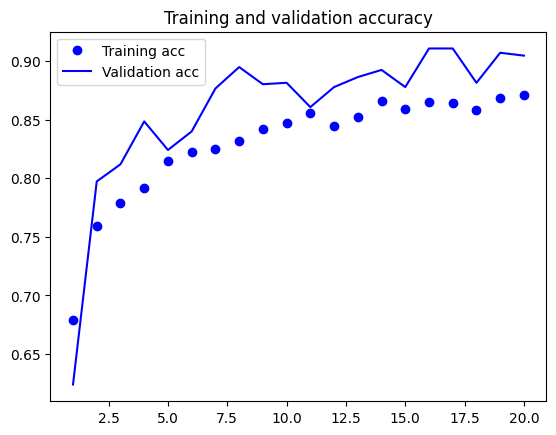

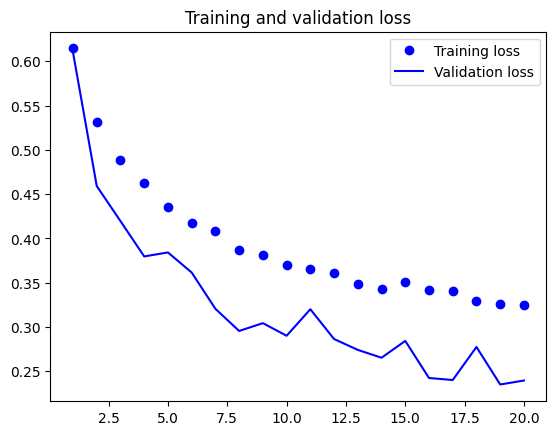

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
import os
import cv2  # OpenCV for image resizing
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Define the path to the image
test_dir = '/content/gdrive/MyDrive/faces2/Validation/male/079591.jpg.jpg'

# Load the image using OpenCV and resize it to the desired target size
target_size = (150, 150)
img = cv2.imread(test_dir)
img = cv2.resize(img, target_size)

# Rescale the image to the range [0, 1]
img = img / 255.0

# Create a single-image generator
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(
    x=np.array([img]),  # Pass the resized image as a NumPy array
    y=None,  # No labels needed for inference
    batch_size=1,  # Set batch size to 1 for a single image
    shuffle=False,  # No need to shuffle for inference
    # You can add more image augmentation options here if needed
)

# Make predictions using your model
y_pred = model.predict(test_generator)

# The 'predictions' variable now contains the model's predictions for the single image
y_pred_classes = (y_pred > 0.5).astype(int)
print(y_pred_classes)

1/1 [==============================] - 1s 508ms/step
[[1]]


In [23]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    class_mode='binary'
)

Found 819 images belonging to 2 classes.


In [24]:
# Assuming y_pred is the output of your model's prediction
y_pred = model.predict(test_generator)

# Convert probabilities to class labels (assuming binary classification)
y_pred_classes = (y_pred > 0.5).astype(int)

# Ensure y_pred_classes has the same number of samples as your test data
assert y_pred_classes.shape[0] == test_generator.samples


26/26 [==============================] - 221s 8s/step


In [25]:
from sklearn.metrics import classification_report
report = classification_report(test_generator.classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.47      0.51      0.49       408
           1       0.47      0.42      0.44       411

    accuracy                           0.47       819
   macro avg       0.47      0.47      0.47       819
weighted avg       0.47      0.47      0.47       819



In [26]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(test_generator.classes, y_pred_classes)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[209 199]
 [237 174]]


In [28]:
# Assuming you have already trained your Keras model and it's stored in a variable 'model'
import pickle

# Save the model to a file using pickle
with open('model_VGG16_Faces.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
